**Датасет - информация об успеваемости из двух Португальских школ.**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv("student-mat.csv", sep=";")
data.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
50,GP,F,16,U,LE3,T,2,2,services,services,...,4,3,3,2,3,4,2,12,13,13
277,GP,M,18,U,GT3,T,4,4,teacher,services,...,3,2,4,1,4,3,22,9,9,9
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,6,11,11,10
255,GP,M,17,U,LE3,T,1,1,health,other,...,4,4,4,1,2,5,2,7,9,8
119,GP,M,15,U,GT3,T,3,4,other,other,...,3,4,3,1,2,4,6,14,13,13
203,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,18,7,6,6
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
120,GP,F,15,U,GT3,T,1,2,at_home,services,...,3,2,3,1,2,1,2,16,15,15


In [5]:
sexBinary = {"M":0, "F":1}
data['sex_bin'] = data['sex'].map(sexBinary)

yesNo = {"yes":1, "no":0}
namesList = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for i in namesList:
    data[i + '_bin'] = data[i].map(yesNo)

data.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,sex_bin,schoolsup_bin,famsup_bin,paid_bin,activities_bin,nursery_bin,higher_bin,internet_bin,romantic_bin
180,GP,M,16,U,GT3,T,4,3,teacher,other,...,8,0,0,1,1,1,1,1,1,0
23,GP,M,16,U,LE3,T,2,2,other,other,...,12,0,0,1,0,1,1,1,1,0
188,GP,F,17,U,GT3,A,3,3,health,other,...,9,1,0,1,0,0,0,1,1,1
54,GP,F,15,U,LE3,A,3,3,other,other,...,13,1,0,0,1,0,1,1,1,0
41,GP,M,15,U,LE3,T,4,4,teacher,other,...,12,0,0,1,0,0,0,1,1,1
72,GP,F,15,R,GT3,T,1,1,other,other,...,5,1,1,1,0,0,0,1,1,1
349,MS,M,18,R,GT3,T,3,2,other,other,...,13,0,0,1,0,0,0,1,1,0
97,GP,F,16,U,GT3,T,2,1,other,other,...,10,1,0,1,1,0,1,1,0,1
282,GP,F,18,R,LE3,T,1,1,at_home,other,...,12,1,0,1,1,1,1,1,0,0
85,GP,F,15,U,GT3,T,4,4,services,services,...,8,1,0,0,1,0,1,1,1,1


In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,G3,sex_bin,schoolsup_bin,famsup_bin,paid_bin,activities_bin,nursery_bin,higher_bin,internet_bin,romantic_bin
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,...,10.415190,0.526582,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,4.581443,0.499926,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,11.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,14.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#data.loc[(data['Medu'] == 4) & (data['Fedu'] == 4)]

data['both_higher'] = ((data['Medu'] == 4) & (data['Fedu'] == 4))*1
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,sex_bin,schoolsup_bin,famsup_bin,paid_bin,activities_bin,nursery_bin,higher_bin,internet_bin,romantic_bin,both_higher
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,0,0,0,1,1,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,1,0,0,0,1,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,1,0,1,0,1,1,1,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,0,1,1,1,1,1,1,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,0,0,1,1,0,1,1,0,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,0,0,0,0,0,0,1,1,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,0,0,0,0,0,0,1,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,0,0,0,0,0,0,1,1,0,0


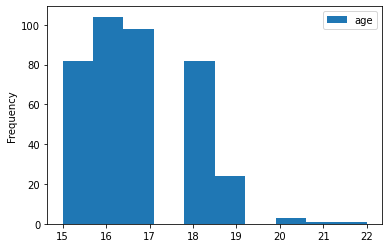

In [15]:
data.plot.hist(y='age')

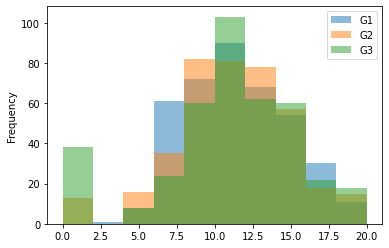

In [19]:
data.plot.hist(y=['G1', 'G2', 'G3'], alpha=0.5)

([<matplotlib.patches.Wedge at 0x2ba30c480c8>,
 [Text(0.9338817003671446, 0.581261532977515, 'both parents got higher education'),
  Text(-0.933881754788773, -0.5812614455411974, 'others')])

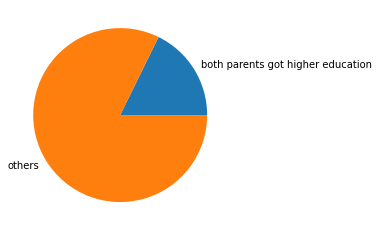

In [35]:
parentsH = (data['both_higher'] == 1).sum()
parentsNotH = (data['both_higher'] == 0).sum()

vals = [parentsH, parentsNotH]
labels = ['both parents got higher education', 'others']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels)